# Compare run on ENER440 and laptop

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file = '../../caesar-explore/sithas/results_0/Sithas_v6_50_100days.dat'
sithas_0 = pd.read_csv(file, sep=' ', index_col=False,
                       names=['Time Step', 'Qw(actual)', 'Qw(expected)', 'Blank', 'Qs', 'Qs1', 'Qs2', 'Qs3', 'Qs4'])

<Figure size 1080x1080 with 0 Axes>

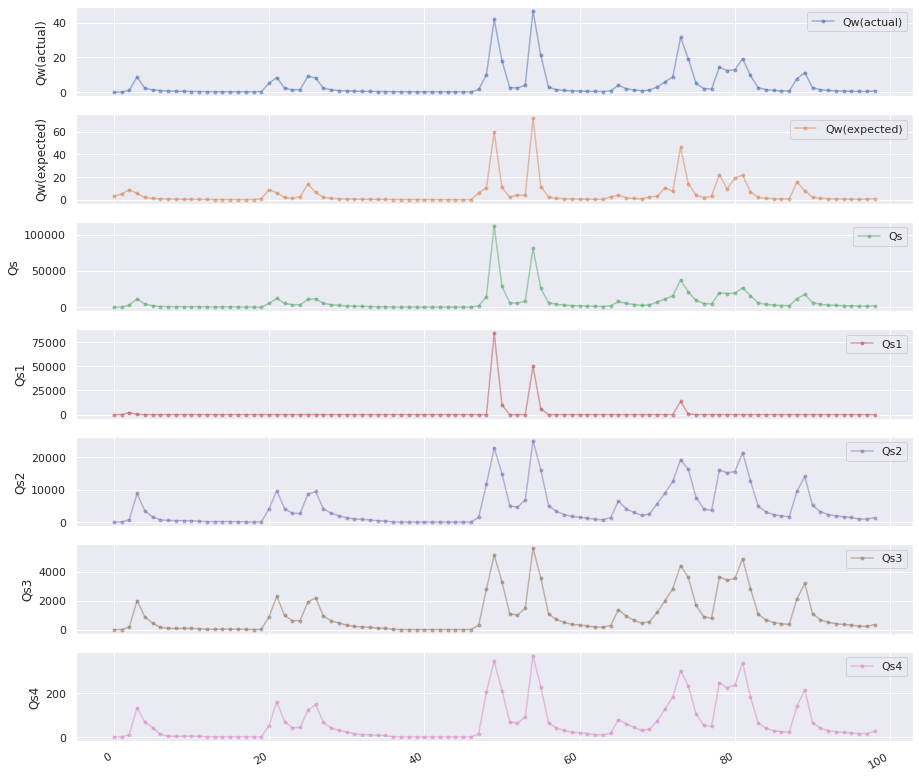

In [3]:
sns.set(rc={'figure.figsize':(15, 15)})
plt.figure()
cols_plot = ['Qw(actual)', 'Qw(expected)', 'Qs', 'Qs1', 'Qs2', 'Qs3', 'Qs4']
axes = sithas_0[cols_plot].plot(marker='.', alpha=0.5, subplots=True)
i = 0
for ax in axes:
    ax.set_ylabel(cols_plot[i])
    i += 1
plt.show()

In [4]:
file = '../../caesar-explore/ener440/sithas/results/Sithas_v7.dat'
sithas_1 = pd.read_csv(file, sep=' ', index_col=False,
                       names=['Time Step', 'Qw(actual)', 'Qw(expected)', 'Blank', 'Qs', 'Suspended', 'Sand', 'Gravel'])

<Figure size 1080x1080 with 0 Axes>

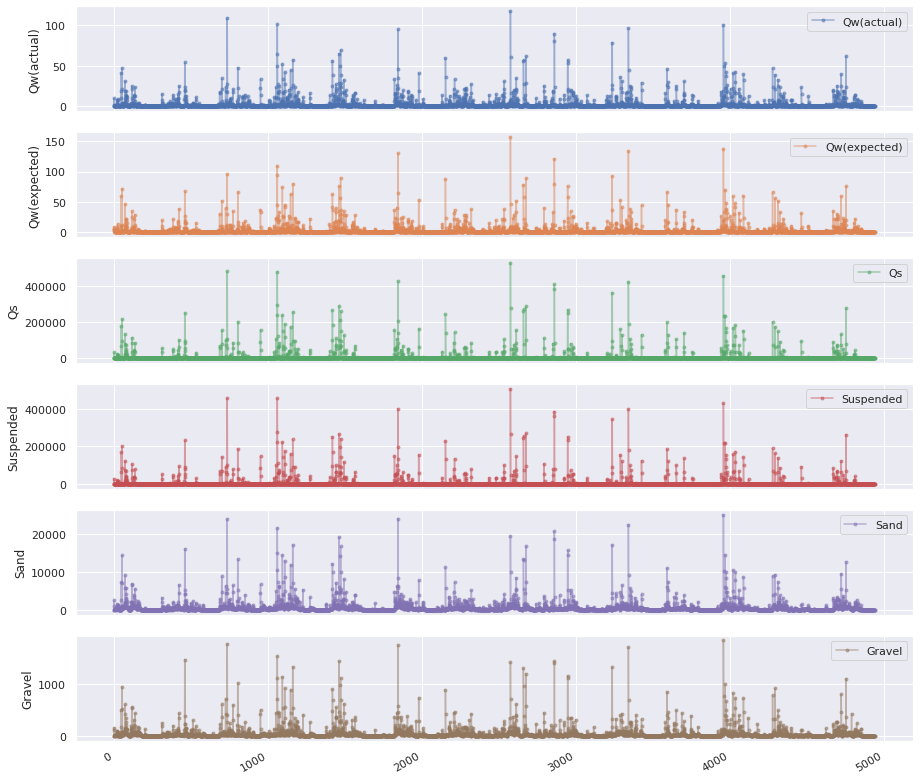

In [5]:
sns.set(rc={'figure.figsize':(15, 15)})
plt.figure()
cols_plot = ['Qw(actual)', 'Qw(expected)', 'Qs', 'Suspended', 'Sand', 'Gravel']
axes = sithas_1[cols_plot].plot(marker='.', alpha=0.5, subplots=True)
i = 0
for ax in axes:
    ax.set_ylabel(cols_plot[i])
    i += 1
plt.savefig('Sithas_catchment.png')
plt.show()

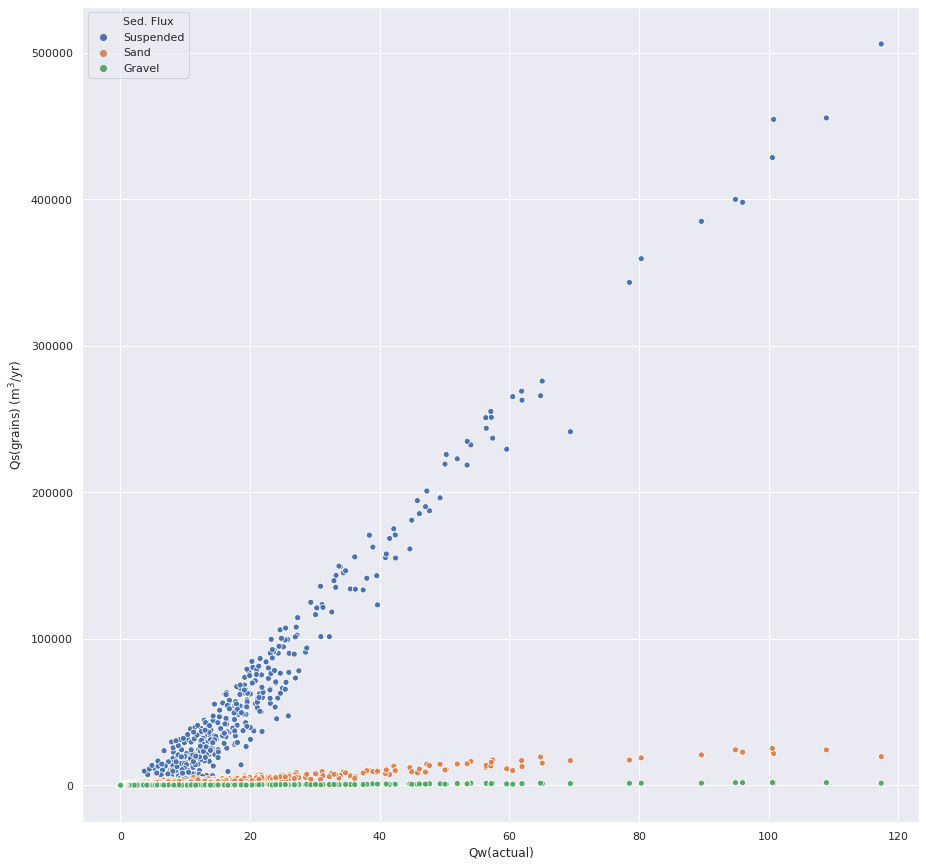

In [6]:
plt.figure()
sithas_ = sithas_1.melt(id_vars=['Qw(actual)'], value_vars=[ 'Suspended', 'Sand', 'Gravel'], var_name='Sed. Flux', value_name='Qs(grains)')
#sns.scatterplot(sithas_1['Qw(actual)'], sithas_1['Qs1'])
g = sns.scatterplot(x='Qw(actual)', y='Qs(grains)', hue='Sed. Flux', data=sithas_)
g.set_ylabel(g.get_ylabel() + ' (m$^3$/yr)')
plt.show()

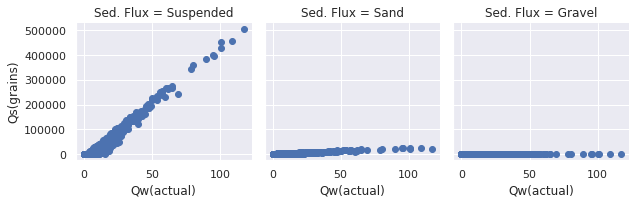

In [7]:
g = sns.FacetGrid(data=sithas_, col='Sed. Flux')
g.map(plt.scatter, 'Qw(actual)', 'Qs(grains)')

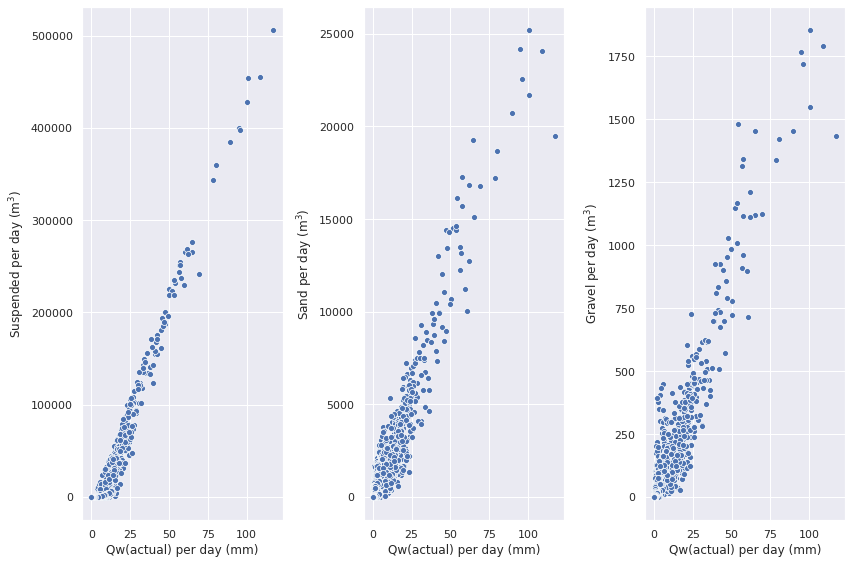

In [8]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(131)
g = sns.scatterplot(sithas_1['Qw(actual)'], sithas_1['Suspended'], ax=ax1)
g.set_xlabel(g.get_xlabel() + ' per day (mm)')
g.set_ylabel(g.get_ylabel() + ' per day (m$^3$)')
ax2 = plt.subplot(132)
g = sns.scatterplot(sithas_1['Qw(actual)'], sithas_1['Sand'], ax=ax2)
g.set_xlabel(g.get_xlabel() + ' per day (mm)')
g.set_ylabel(g.get_ylabel() + ' per day (m$^3$)')
ax3 = plt.subplot(133)
g = sns.scatterplot(sithas_1['Qw(actual)'], sithas_1['Gravel'], ax=ax3)
g.set_xlabel(g.get_xlabel() + ' per day (mm)')
g.set_ylabel(g.get_ylabel() + ' per day (m$^3$)')
plt.tight_layout()
plt.savefig('rain-sed-relation.png')
plt.show()

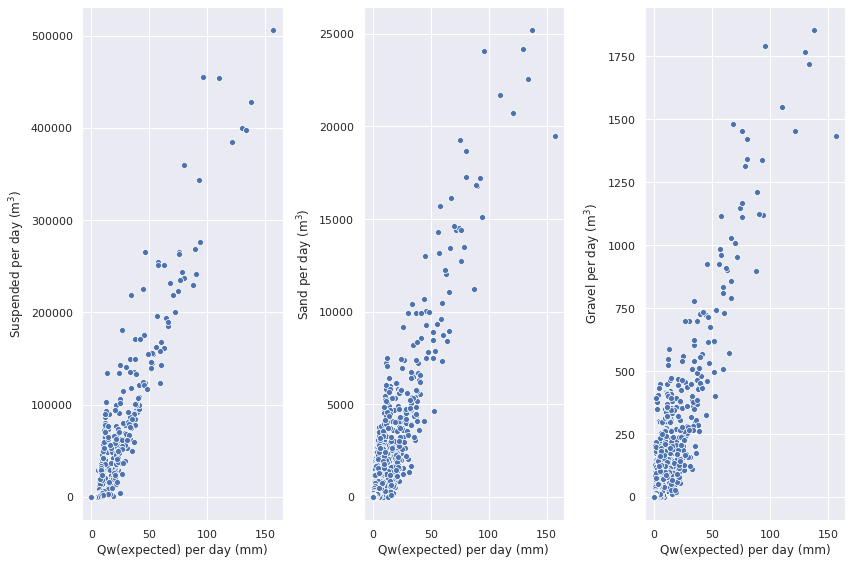

In [9]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(131)
g = sns.scatterplot(sithas_1['Qw(expected)'], sithas_1['Suspended'], ax=ax1)
g.set_xlabel(g.get_xlabel() + ' per day (mm)')
g.set_ylabel(g.get_ylabel() + ' per day (m$^3$)')
ax2 = plt.subplot(132)
g = sns.scatterplot(sithas_1['Qw(expected)'], sithas_1['Sand'], ax=ax2)
g.set_xlabel(g.get_xlabel() + ' per day (mm)')
g.set_ylabel(g.get_ylabel() + ' per day (m$^3$)')
ax3 = plt.subplot(133)
g = sns.scatterplot(sithas_1['Qw(expected)'], sithas_1['Gravel'], ax=ax3)
g.set_xlabel(g.get_xlabel() + ' per day (mm)')
g.set_ylabel(g.get_ylabel() + ' per day (m$^3$)')
plt.tight_layout()
plt.show()

In [10]:
file = '../../caesar-explore/ener440/sithas/input_data/Chalkio_rain.txt'
sithas_rain = pd.read_csv(file, sep=' ', index_col=False,
                       names=['Rainfall'])

In [11]:
sithas_all = pd.concat([sithas_1, sithas_rain], axis=1, sort=False).dropna()
sithas_all

,Time Step,Qw(actual),Qw(expected),Blank,Qs,Suspended,Sand,Gravel,Rainfall
0,1.0,0.000109,3.233563,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.425000
1,2.0,0.007253,5.129802,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
2,3.0,0.073223,8.936142,0.0,21.806134,2.000000e-10,20.719363,1.086771,0.333333
3,4.0,9.875145,5.754876,0.0,31729.845531,2.901502e+04,2555.909341,158.913917,0.000000
4,5.0,2.082493,2.159844,0.0,1259.372807,4.891309e-01,1154.075079,104.808597,0.000000
...,...,...,...,...,...,...,...,...,...
4937,4938.0,0.032743,0.048820,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4938,4939.0,0.032311,0.048187,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4939,4940.0,0.031890,0.047571,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4940,4941.0,0.031498,0.046970,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000


In [12]:
sithas_melt = sithas_all.melt(id_vars=['Rainfall'], value_vars=[ 'Suspended', 'Sand', 'Gravel'], var_name='Sed. Flux', value_name='Qs(grains)')
sithas_melt

,Rainfall,Sed. Flux,Qs(grains)
0,0.425000,Suspended,0.000000e+00
1,0.000000,Suspended,0.000000e+00
2,0.333333,Suspended,2.000000e-10
3,0.000000,Suspended,2.901502e+04
4,0.000000,Suspended,4.891309e-01
...,...,...,...
14821,0.000000,Gravel,0.000000e+00
14822,0.000000,Gravel,0.000000e+00
14823,0.000000,Gravel,0.000000e+00
14824,0.000000,Gravel,0.000000e+00


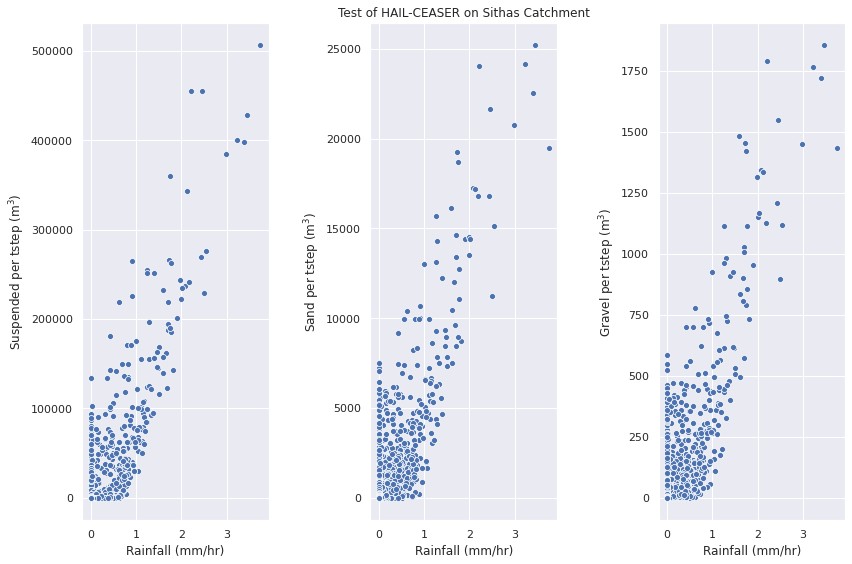

In [14]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(131)
g = sns.scatterplot(sithas_all['Rainfall'], sithas_all['Suspended'], ax=ax1)
g.set_xlabel(g.get_xlabel() + ' (mm/hr)')
g.set_ylabel(g.get_ylabel() + ' per tstep (m$^3$)')
ax2 = plt.subplot(132)
g = sns.scatterplot(sithas_all['Rainfall'], sithas_all['Sand'], ax=ax2)
g.set_xlabel(g.get_xlabel() + ' (mm/hr)')
g.set_ylabel(g.get_ylabel() + ' per tstep (m$^3$)')
plt.title('Test of HAIL-CEASER on Sithas Catchment')
ax3 = plt.subplot(133)
g = sns.scatterplot(sithas_all['Rainfall'], sithas_all['Gravel'], ax=ax3)
g.set_xlabel(g.get_xlabel() + ' (mm/hr)')
g.set_ylabel(g.get_ylabel() + ' per tstep (m$^3$)')
plt.tight_layout()
plt.savefig('rain-sed-relation.png')
plt.show()

<Figure size 1080x1080 with 0 Axes>

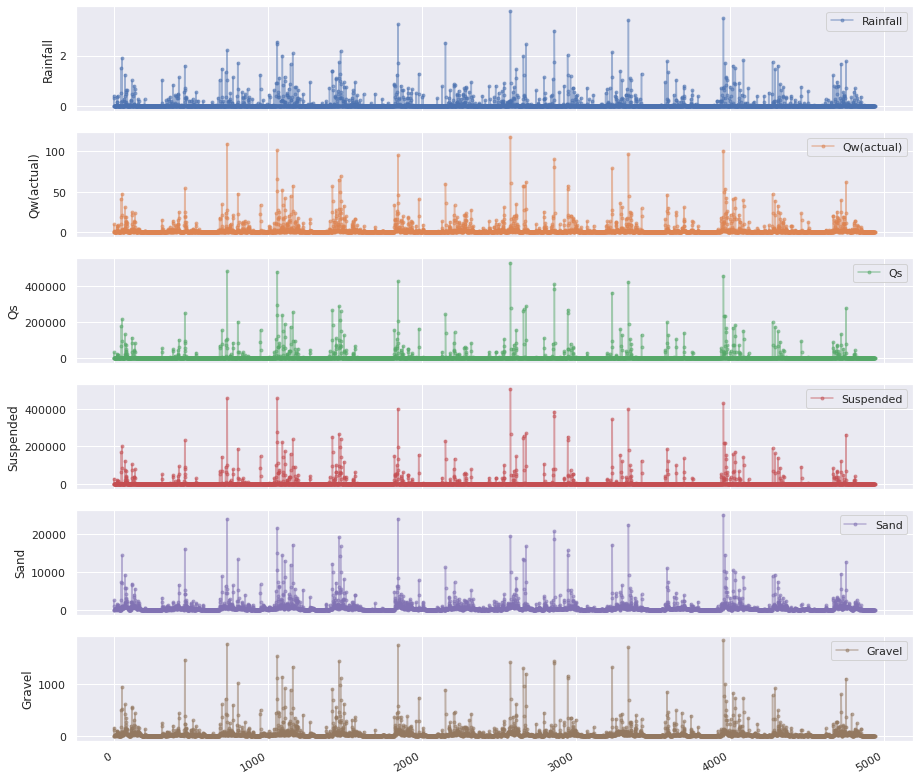

In [15]:
sns.set(rc={'figure.figsize':(15, 15)})
plt.figure()
cols_plot = ['Rainfall', 'Qw(actual)', 'Qs', 'Suspended', 'Sand', 'Gravel']
axes = sithas_all[cols_plot].plot(marker='.', alpha=0.5, subplots=True)
i = 0
for ax in axes:
    ax.set_ylabel(cols_plot[i])
    i += 1
plt.savefig('Sithas_catchment.png')
plt.show()